In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
fetcher = odf('TSLA')
stock_data = fetcher.fetch_stock_data("2022-01-01", "2025-05-18")

Accuracy: 0.56


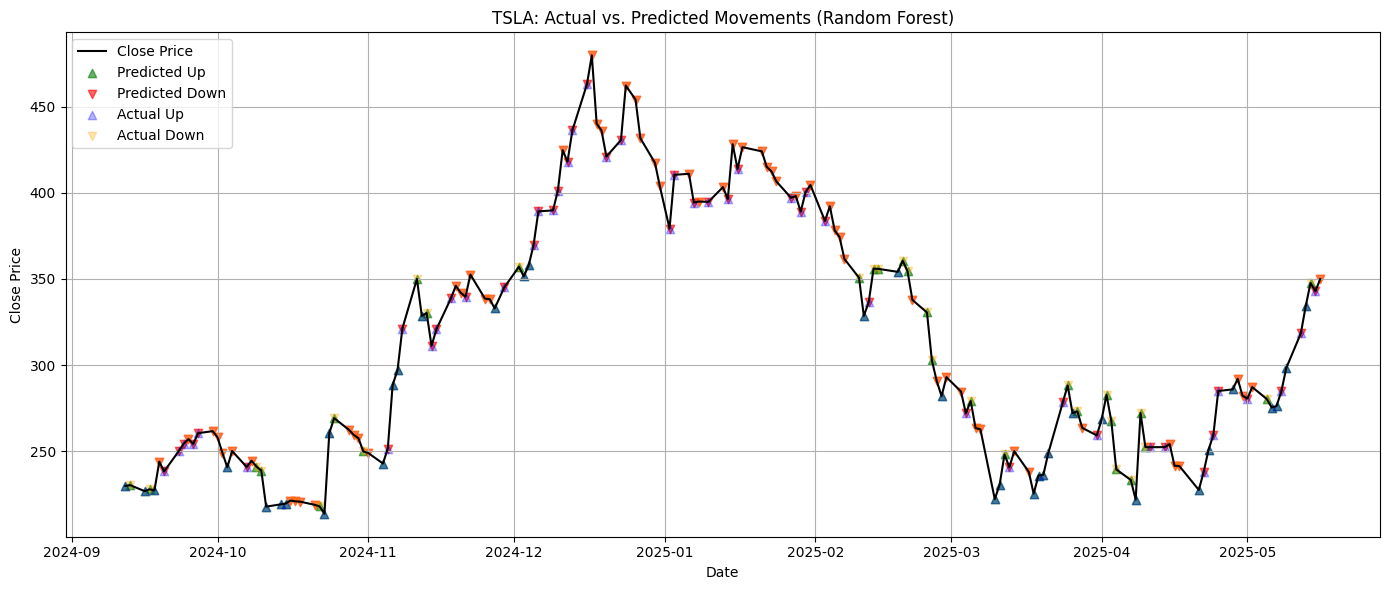

In [33]:
# 2. Target: 1 if next day Close > today Close, else 0
stock_data['Target'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# 3. Features and drop NA
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
stock_data.dropna(inplace=True)
X = stock_data[features]
y = stock_data['Target']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 5. Train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 8. Create test DataFrame with actual and predicted
stock_test = stock_data.iloc[-len(y_test):].copy()
stock_test['Predicted'] = y_pred
stock_test['Actual'] = y_test.values

# 9. Plotting
plt.figure(figsize=(14, 6))
plt.plot(stock_test.index, stock_test['Close'], label='Close Price', color='black')

# Predicted UP (Green)
pred_up = stock_test[stock_test['Predicted'] == 1]
plt.scatter(pred_up.index, pred_up['Close'], marker='^', color='green', label='Predicted Up', alpha=0.6)

# Predicted DOWN (Red)
pred_down = stock_test[stock_test['Predicted'] == 0]
plt.scatter(pred_down.index, pred_down['Close'], marker='v', color='red', label='Predicted Down', alpha=0.6)

# Actual UP (Blue)
actual_up = stock_test[stock_test['Actual'] == 1]
plt.scatter(actual_up.index, actual_up['Close'], marker='^', color='blue', label='Actual Up', alpha=0.3)

# Actual DOWN (Orange)
actual_down = stock_test[stock_test['Actual'] == 0]
plt.scatter(actual_down.index, actual_down['Close'], marker='v', color='orange', label='Actual Down', alpha=0.3)
plt.title("TSLA: Actual vs. Predicted Movements (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
